<a href="https://colab.research.google.com/github/Abdulrashif/Machine-learning/blob/main/CNN_flowerclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228818944/228813984 [==============================] - 1s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6687138903_ff6ae12758_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8926641787_d2515dfe8f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6125332325_b768e08bd9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5050969148_a0090f762a.jpg'),
 PosixPath('datasets/flower_photos/roses/12407768513_3440238148_n.jpg')]

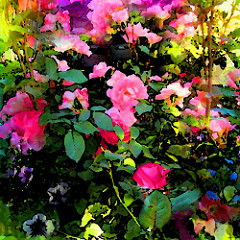

In [ ]:
PIL.Image.open(str(roses[1]))

In [ ]:
flowers_image_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflower': list(data_dir.glob('sunflower/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflower': 3,
    'tulips': 4

}

In [ ]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
img.shape

(240, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
x , y = [],[]
for flower_name, images in flowers_image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_image = cv2.resize(img,(180,180))
    x.append(resized_image)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [ ]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(120, activation='relu'),
  layers.Dense(5, )
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
75/75 [==============================] - 1s 15ms/step - loss: 1.1853 - accuracy: 0.4432
Epoch 2/30
75/75 [==============================] - 1s 15ms/step - loss: 0.8807 - accuracy: 0.6397
Epoch 3/30
75/75 [==============================] - 1s 14ms/step - loss: 0.7399 - accuracy: 0.7033
Epoch 4/30
75/75 [==============================] - 1s 14ms/step - loss: 0.5769 - accuracy: 0.7774
Epoch 5/30
75/75 [==============================] - 1s 15ms/step - loss: 0.4046 - accuracy: 0.8556
Epoch 6/30
75/75 [==============================] - 1s 15ms/step - loss: 0.2775 - accuracy: 0.9116
Epoch 7/30
75/75 [==============================] - 1s 15ms/step - loss: 0.1571 - accuracy: 0.9524
Epoch 8/30
75/75 [==============================] - 1s 15ms/step - loss: 0.1263 - accuracy: 0.9571
Epoch 9/30
75/75 [==============================] - 1s 14ms/step - loss: 0.0564 - accuracy: 0.9848
Epoch 10/30
75/75 [==============================] - 1s 14ms/step - loss: 0.0225 - accuracy: 0.9966
Epoch 11/

In [ ]:
model.evaluate(x_test_scaled,y_test)

19/19 [==============================] - 0s 9ms/step - loss: 2.4380 - accuracy: 0.6689


[2.4380247592926025, 0.6689075827598572]

In [ ]:
data_augmentation = keras.Sequential([
  layers.experimental.preprocessing.RandomFlip('horizontal',
                                               input_shape=(180,
                                                            180,
                                                            3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1)
])

In [ ]:
model = Sequential([
  data_augmentation,                  
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  layers.Flatten(),
  layers.Dense(130, activation='relu'),
  layers.Dense(5, )
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
75/75 [==============================] - 1s 18ms/step - loss: 1.2959 - accuracy: 0.4230
Epoch 2/30
75/75 [==============================] - 1s 18ms/step - loss: 0.9916 - accuracy: 0.5762
Epoch 3/30
75/75 [==============================] - 1s 18ms/step - loss: 0.8949 - accuracy: 0.6263
Epoch 4/30
75/75 [==============================] - 1s 18ms/step - loss: 0.8269 - accuracy: 0.6721
Epoch 5/30
75/75 [==============================] - 1s 18ms/step - loss: 0.7952 - accuracy: 0.6886
Epoch 6/30
75/75 [==============================] - 1s 18ms/step - loss: 0.7561 - accuracy: 0.6965
Epoch 7/30
75/75 [==============================] - 1s 18ms/step - loss: 0.7340 - accuracy: 0.7151
Epoch 8/30
75/75 [==============================] - 1s 18ms/step - loss: 0.7104 - accuracy: 0.7184
Epoch 9/30
75/75 [==============================] - 1s 18ms/step - loss: 0.6752 - accuracy: 0.7269
Epoch 10/30
75/75 [==============================] - 1s 18ms/step - loss: 0.6363 - accuracy: 0.7517
Epoch 11/

In [ ]:
model.evaluate(x_test_scaled,y_test)

19/19 [==============================] - 0s 8ms/step - loss: 0.9191 - accuracy: 0.7311


[0.9191482067108154, 0.7310924530029297]